# Pymaceuticals Inc.
---

### Analysis

- From the bar and pie charts, we can see that the sex ratio of mice is close to even. The drug regimens Capomulin and Ramicane are compared to other drugs, appearing at more timepoints. This could indicate that there are reasons for the more frequent use of these two drugs, such as fewer side effects or greater effectiveness.
  The above reasoning is also reflected in the boxplot. The final tumor volume of mice using Capomulin and Ramicane, compared to Infubinol and Ceftamin, is significantly smaller with no outliers
  The line plot also demonstrates a gradual decrease in tumor volume after Capomulin was used. In the final comparison between mouse weight and the average tumor volume, we can conclude that there is a positive correlation between them: the heavier the mouse, the larger the tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results,mouse_metadata,how='left',on=['Mouse ID'])

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = len(merged_data_df['Mouse ID'].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_df[merged_data_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = merged_data_df[merged_data_df['Mouse ID'] != 'g989']
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(cleaned_data_df['Mouse ID'].unique())
new_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = [st.sem(volume)for drug, volume in cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)']]

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volum": tumor_mean,
                                     "Median Tumor Volume":tumor_median,
                                 "Tumor Volume Variance":tumor_variance,
                                     "Tumor Volume Std. Dev":tumor_std,
                                   "Tumor Volume Std. Err.":tumor_sem,})

drug_regimen_summary


,Mean Tumor Volum,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary2 = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean',median='median',var='var',std='std',sem=st.sem)

drug_regimen_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

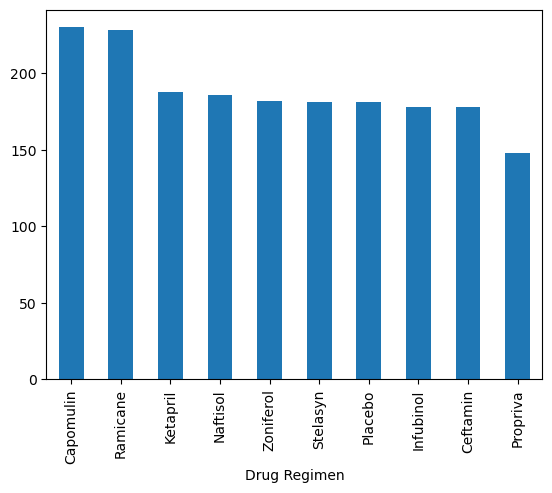

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = cleaned_data_df['Drug Regimen'].value_counts()

mouse_timepoints.plot(kind='bar',x='Drug Regimen',y='# of Observed Mouse Timepoints')
plt.show()

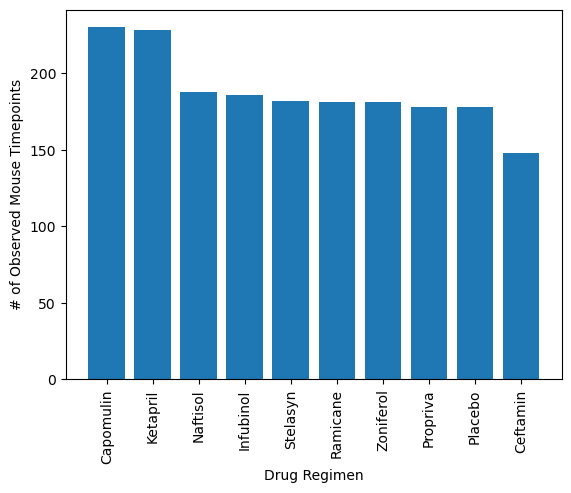

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_reg = cleaned_data_df['Drug Regimen'].unique()
mouse_timepoints= cleaned_data_df['Drug Regimen'].value_counts()

plt.bar(drug_reg,mouse_timepoints)
plt.xticks(drug_reg,rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

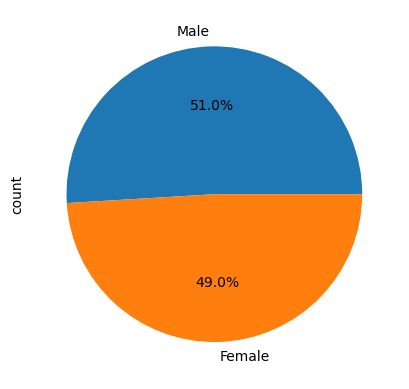

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ['Male','Female']
mouse_gender = cleaned_data_df['Sex'].value_counts()

mouse_gender.plot(kind='pie',y='Sex', labels=labels, autopct='%1.1f%%')
plt.show()

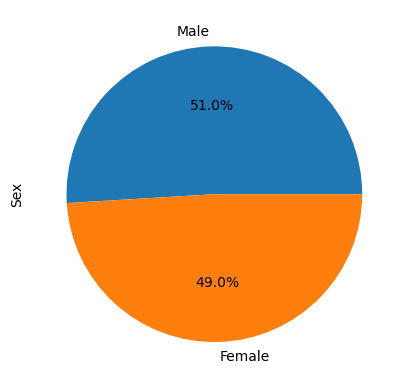

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
mouse_gender = cleaned_data_df['Sex'].value_counts()

plt.pie(mouse_gender,labels=labels,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoints_data = pd.merge(cleaned_data_df,last_timepoints,how='left',on=['Mouse ID'])
merge_timepoints_data_df = merge_timepoints_data.rename(columns={'Timepoint_x':'Timepoint',
                                                                'Timepoint_y': 'Last Timepoint'})

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
select_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in select_regimens_list:

    tumor_volume_data = merge_timepoints_data_df.loc[merge_timepoints_data_df['Drug Regimen'] == drug]
    last_tumor_volume = tumor_volume_data.loc[tumor_volume_data['Timepoint'] == tumor_volume_data['Last Timepoint']]['Tumor Volume (mm3)']
    quartiles = last_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # add subset 
    tumor_volume_list.append(last_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    outlier = tumor_volume_data.loc[(tumor_volume_data['Tumor Volume (mm3)'] < lower_bound) | (tumor_volume_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier.iloc[:,2]}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


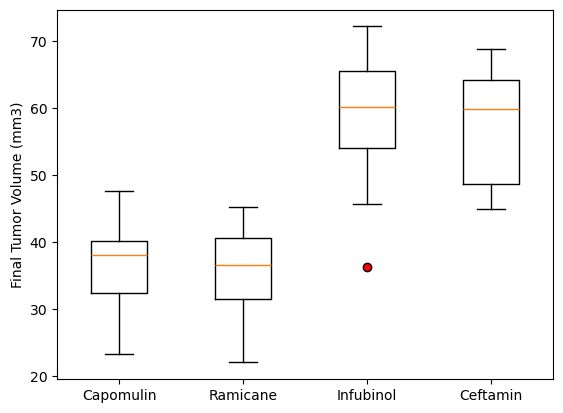

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig,ax = plt.subplots()
ax.boxplot(tumor_volume_list,labels=select_regimens_list,flierprops = dict(markerfacecolor = "red"))
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

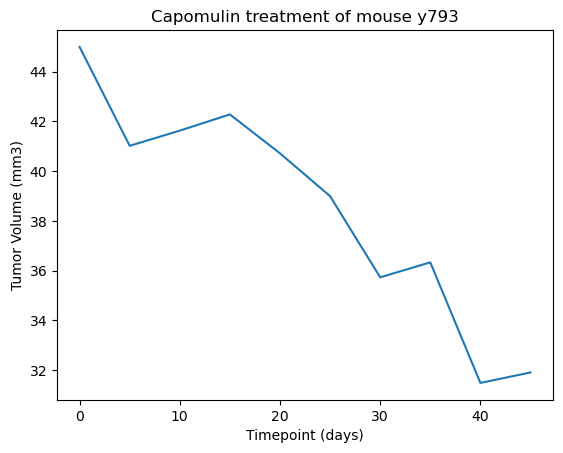

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = merge_timepoints_data_df[merge_timepoints_data_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
chosen_mouse = np.random.choice(capomulin_mice)

capomulin_timepoint = merge_timepoints_data_df[[merge_timepoints_data_df['Drug Regimen'] == 'Capomulin'] and merge_timepoints_data_df['Mouse ID'] == chosen_mouse]

plt.plot(capomulin_timepoint['Timepoint'],capomulin_timepoint['Tumor Volume (mm3)'])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {chosen_mouse}")
plt.show()

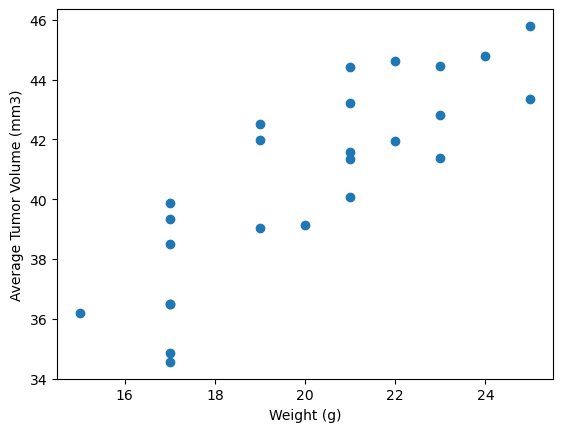

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice2 = merge_timepoints_data_df[merge_timepoints_data_df['Drug Regimen'] == 'Capomulin']
capomulin_weight = capomulin_mice2.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_volume = capomulin_mice2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_weight, capomulin_volume)

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


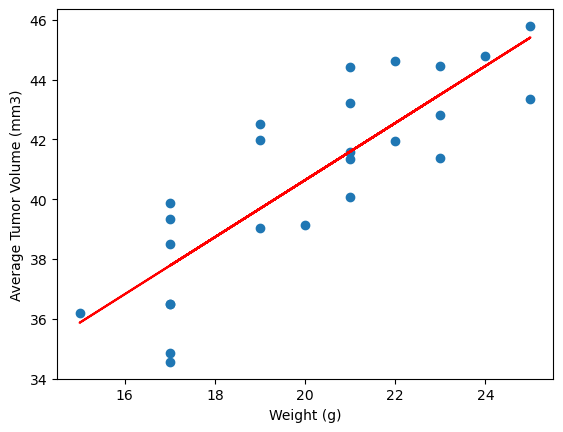

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f'The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(capomulin_weight, capomulin_volume)[0],2)}')

plt.scatter(capomulin_weight, capomulin_volume)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(capomulin_weight, capomulin_volume)
cap_fit = cap_slope * capomulin_weight + cap_int
plt.plot(capomulin_weight,cap_fit,color='r')

plt.show()